In [5]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'matplotlib'

In [76]:
# np.random.seed(0)
# x = np.random.rand(100, 1)
# y = 2 + 3 * x + np.random.rand(100, 1)

In [12]:
# reading the dataset file
file = open('final_dataset.json')
json1 = json.load(file)

In [13]:
# some salaries have null/improper values, so filter them out
json1 = list(filter(lambda x: x['avgSalary'], json1))

In [14]:
# taking care of outliers
# some candidates receive ridiculously high salary for their level of exp

json1 = list(filter(lambda x: x['avgSalary'] < 3500000, json1))

In [15]:
# some formatting
x = np.array([list(map(lambda x: x['avgExp'], json1))])
y = np.array([list(map(lambda x: x['avgSalary'], json1))])

x = np.transpose(x)
y = np.transpose(y)
# x = list(map(lambda x: x['avgExp'], json1))
# y = list(map(lambda x: x['avgSalary'], json1))

In [16]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)



Slope: [[ 132225.89775282]]
Intercept: [ 142689.49555097]
Root mean squared error:  265022043722.0
R2 score:  0.465457094827


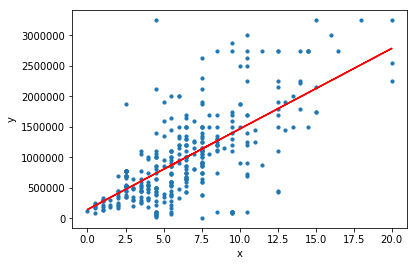

In [17]:
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [37]:
exp = 5
salary = 132225.89775282 * exp + 142689.49555097

print ('salary is: ' + str(salary))


salary is: 803818.98431507


In [38]:
df = pd.read_json('final_dataset.json')
margin = 100000

df.query('avgSalary < ' + str(salary + margin) + ' & avgSalary > ' +str(salary - margin))

,avgExp,avgSalary,desig,exp,higherExp,higherSalary,id,loc,location,lowerExp,lowerSalary,org,salary,skillset,url
6,2.5,775000.0,Trainees- Cyber Security- SM,0-5 yrs,5,1000000.0,11,"Ahmedabad, Pune, Delhi NCR",NaN,0,550000,Value C Consulting Services Private Limited,"5,50,000 - 10,00,000 PA.","Cyber Security, Penetration Testing, cyber rou...",https://www.naukri.com/job-listings-Trainees-C...
7,2.5,775000.0,Trainees- Cyber Security- DM,0-5 yrs,5,1000000.0,12,"Bengaluru, Chennai, Mysore",NaN,0,550000,Value C Consulting Services Private Limited,"5,50,000 - 10,00,000 PA.","Cyber Security, cyber routers, cyber network",https://www.naukri.com/job-listings-Trainees-C...
20,7.0,800000.0,"Advisor, IT Security- Bangalore Location- Imme...",5-9 yrs,9,1100000.0,59,Bengaluru,bengaluru,5,500000,Technosoft Global Services Pvt Ltd,"5,00,000 - 11,00,000 PA.","IAM, Servicenow, Active Directory",https://www.naukri.com/job-listings-Advisor-IT...
27,7.5,750000.0,Frontend Automation Testing Requirement Bangalore,5-10 yrs,10,1000000.0,101,Bengaluru,bengaluru,5,500000,Technosoft Global Services Pvt Ltd,"5,00,000 - 10,00,000 PA.","rest, protractor, Jasmine, automation testing,...",https://www.naukri.com/job-listings-Frontend-A...
33,7.5,850000.0,Network Engineer | Kanjurmarg East | Mumbai,5-10 yrs,10,1000000.0,118,Mumbai,mumbai,5,700000,M/s Fast and Furious Consulting,"7,00,000 - 10,00,000 PA.","Network Engineering, Juniper, WAN, Network Sec...",https://www.naukri.com/job-listings-Network-En...
43,2.5,775000.0,Trainees- Cyber Security- VP,0-5 yrs,5,1000000.0,148,Bengaluru,bengaluru,0,550000,Value C Consulting Services Private Limited,"5,50,000 - 10,00,000 PA.","Cyber Security, Penetration Testing, cyber rou...",https://www.naukri.com/job-listings-Trainees-C...
44,2.5,775000.0,Trainees- Cyber Security- RK,0-5 yrs,5,1000000.0,149,"Bengaluru, Hyderabad, Guntur",NaN,0,550000,Value C Consulting Services Private Limited,"5,50,000 - 10,00,000 PA.","Cyber Security, cyber routers, cyber network",https://www.naukri.com/job-listings-Trainees-C...
45,2.5,775000.0,Trainees-cyber Security - VP,0-5 yrs,5,1000000.0,150,Bengaluru,bengaluru,0,550000,Value C Consulting Services Private Limited,"5,50,000 - 10,00,000 PA.","Cyber Security, Ceh, ethical hacking",https://www.naukri.com/job-listings-Trainees-c...
49,7.5,750000.0,Urgent Opening For SOC Lead - Cyber Security,5-10 yrs,10,1000000.0,158,Mumbai(Charni Road),mumbai,5,500000,S.C.S. Pvt Ltd.,"5,00,000 - 10,00,000 PA.","cyber security, HIPS, Network Security, inform...",https://www.naukri.com/job-listings-Urgent-Ope...
58,2.5,775000.0,Trainees- Cyber Security- VP,0-5 yrs,5,1000000.0,200,Bengaluru(Koramangala),bengaluru,0,550000,Value C Consulting Services Private Limited,"5,50,000 - 10,00,000 PA.","it security, Cyber Security, security consulta...",https://www.naukri.com/job-listings-Trainees-C...
